In [387]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [388]:
import os
os.getcwd()
os.chdir('C:\\Users\\Omkar\\Desktop\\Task\\Original\\Original')

In [389]:
Train = pd.read_csv('TRAINING.csv')
Train.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,Price
0,1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826$
1,2,344,6.0,7.0,7.0,8.0,no,0.0,83.0,7,97.0,1,B,4458$
2,3,294,8.0,4.0,3.0,4.0,yes,97.0,78.0,1,88.0,4,C,4199$
3,4,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462$
4,5,295,9.0,5.0,3.0,5.0,NaN,NaN,97.0,4,93.0,3,C,4543$


In [390]:
#Converting 'Price' into numerical variable
Train['Price'].str.len().value_counts()
Train['Price']=Train['Price'].str[0:4]
Train['Price']=pd.to_numeric(Train['Price'])

In [391]:
#Converting 'roof' variable in numerical
Train['roof'].value_counts()
Train['roof'] = Train['roof'].map({'yes': 1, 'no': 0, 'YES': 1, 'NO': 0})

In [392]:
#Praportion of Target variable categries
#(Train['Grade'].value_counts()/len(Train['Grade']))*100
Train['Grade'].value_counts()

C    2928
D    2129
B    1475
A     442
E      26
Name: Grade, dtype: int64

## Blacing the Data set

In [393]:
#Creating x and y variables
x=Train.drop(Train.iloc[:,[0,12]],axis=1)
y=Train.iloc[:,12]

In [394]:
#from collections import Counter
from imblearn.over_sampling import RandomOverSampler
osm=RandomOverSampler(random_state=1)
x1, y1=osm.fit_sample(x,y)

In [395]:
#Checking the propotion
(y1.value_counts()/len(y1))*100
y1.value_counts()

D    2928
C    2928
A    2928
B    2928
E    2928
Name: Grade, dtype: int64

In [396]:
#Creating Blanced Data set
y1=pd.DataFrame(y1,columns=['Grade'])
y1['RowId']=np.arange(0,len(y1))
x1['RowId']=np.arange(0,len(x1))
BData=x1.merge(y1, how='inner', on='RowId')
BData.drop(['RowId'],1,inplace=True)
BData.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Price,Grade
0,305,8.0,2.0,1.0,3.0,0.0,0.0,76.0,2,63.0,4,3826,D
1,344,6.0,7.0,7.0,8.0,0.0,0.0,83.0,7,97.0,1,4458,B
2,294,8.0,4.0,3.0,4.0,1.0,97.0,78.0,1,88.0,4,4199,C
3,328,5.0,4.0,2.0,4.0,0.0,0.0,91.0,5,86.0,1,3462,D
4,295,9.0,5.0,3.0,5.0,NaN,NaN,97.0,4,93.0,3,4543,C


## Model selection by KFold Cross validation for missing values

In [397]:
#Creating Train and Test Data sets
MTrain=BData[BData['roof'].isnull()==False] #Non missing values data
GD=pd.get_dummies(MTrain['Grade'],prefix='Grade') #Creating dummy variables for Grade
MTrain=pd.concat([MTrain,GD],axis=1)
MTrain.drop(['Grade','Grade_E'],1,inplace=True) #Droping original 'Grade' variabel
MTrain_y=MTrain['roof'] #Creating y variable from non missing values data
MTrain_x=MTrain.drop(['roof','Roof(Area)'],1) #Creating x variables from non missing values data
MTrain_x.fillna(MTrain_x.mean(),inplace=True) #filling missing values with their column mean

MTest_x=BData[BData['roof'].isnull()==True] #Missing values data
MTest_x.drop(['roof','Roof(Area)'],1,inplace=True) #Droping roof and Roof(Area) variables
GD1=pd.get_dummies(MTest_x['Grade'],prefix='Grade') #Creating dummy variables for Grade
MTest_x=pd.concat([MTest_x,GD1],axis=1)
MTest_x.drop(['Grade'],1,inplace=True) #Droping original 'Grade' variabel
MTest_x=MTest_x.fillna(MTest_x.mean()) #filling missing values with their column mean

In [398]:
#Fitting model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

LR=LogisticRegression()
DT=DecisionTreeClassifier()
RF=RandomForestClassifier()
AB=AdaBoostClassifier()
GB=GradientBoostingClassifier()
XGB=XGBClassifier()

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 10, shuffle = True, random_state = 1)
LR_KCV = cross_val_score(LR, MTrain_x, MTrain_y, cv=folds)
DT_KCV = cross_val_score(DT, MTrain_x, MTrain_y, cv=folds)
RF_KCV = cross_val_score(RF, MTrain_x, MTrain_y, cv=folds)
AB_KCV = cross_val_score(AB, MTrain_x, MTrain_y, cv=folds)
GB_KCV = cross_val_score(GB, MTrain_x, MTrain_y, cv=folds)
XGB_KCV = cross_val_score(XGB, MTrain_x, MTrain_y, cv=folds)

Text(0, 0.5, 'Accuracy score')

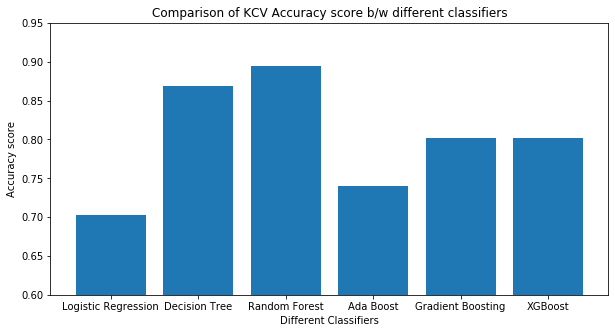

In [399]:
#Comparing KCV Accuracy score b/w different models
method=['Logistic Regression', 'Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boosting', 'XGBoost']
KCV_score=[LR_KCV.mean(), DT_KCV.mean(), RF_KCV.mean(), AB_KCV.mean(), GB_KCV.mean(), XGB_KCV.mean()]

plt.figure(figsize=(10,5))
plt.bar(method, KCV_score)
plt.ylim(0.6,0.95)
plt.title('Comparison of KCV Accuracy score b/w different classifiers')
plt.xlabel('Different Classifiers')
plt.ylabel('Accuracy score')

In [400]:
#Predicting 'roof' for missing Data
RF.fit(MTrain_x, MTrain_y)
MTest_y=RF.predict(MTest_x)

In [401]:
#Adding 'roof' and Remaining data as 'MTest'
MTest_y=pd.DataFrame(MTest_y,columns=['roof'])
MTest_y['RowId']=np.arange(0,len(MTest_y))
MTest=MTest_x.copy()
MTest['RowId']=np.arange(0,len(MTest))
MTest=MTest.merge(MTest_y, how='inner', on='RowId')
MTest.drop(['RowId'],1,inplace=True)
#Calculating 'Roof(Area)' for missing Data
MTest['Roof(Area)']=[MTrain['Roof(Area)'].mean() if x==1 else 0 for x in MTest['roof']]
#Adding 'Grade' data to 'MTrain' data set
GradeTe=BData['Grade'][BData['roof'].isnull()==True].tolist()
MTest['Grade']=GradeTe
MTest

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Lawn(Area),Nfloors,API,ANB,Price,Grade_A,Grade_B,Grade_C,Grade_D,roof,Roof(Area),Grade
0,295,9.0,5.0,3.0,5.0,97.0,4,93.0,3,4543,0,0,1,0,1.0,39.686786,C
1,298,5.0,5.0,4.0,6.0,103.0,6,62.0,2,3357,0,0,0,1,0.0,0.000000,D
2,329,5.0,7.0,7.0,8.0,79.0,6,67.0,3,4073,0,1,0,0,1.0,39.686786,B
3,304,6.0,7.0,5.0,7.0,81.0,8,76.0,6,4413,0,1,0,0,1.0,39.686786,B
4,305,8.0,8.0,5.0,7.0,94.0,8,99.0,4,4917,1,0,0,0,1.0,39.686786,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,342,5.0,3.0,1.0,3.0,108.0,2,69.0,6,3446,0,0,0,1,1.0,39.686786,D
2376,303,7.0,4.0,3.0,4.0,91.0,3,70.0,2,3427,0,0,0,1,0.0,0.000000,D
2377,339,6.0,3.0,3.0,4.0,92.0,2,80.0,3,4053,0,0,0,1,1.0,39.686786,D
2378,344,5.0,4.0,2.0,4.0,78.0,3,65.0,2,3833,0,0,0,1,1.0,39.686786,D


In [402]:
#Chaning columns order for 'MTrain'
cols=MTrain.columns.tolist()
cols=cols[0:5]+cols[7:16]+cols[5:7]
MTrain=MTrain[cols]
#Adding 'Grade' data to 'MTrain' data set
GradeTr=BData['Grade'][BData['roof'].isnull()==False].tolist()
MTrain['Grade']=GradeTr
MTrain

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Lawn(Area),Nfloors,API,ANB,Price,Grade_A,Grade_B,Grade_C,Grade_D,roof,Roof(Area),Grade
0,305,8.0,2.0,1.0,3.0,76.0,2,63.0,4,3826,0,0,0,1,0.0,0.0,D
1,344,6.0,7.0,7.0,8.0,83.0,7,97.0,1,4458,0,1,0,0,0.0,0.0,B
2,294,8.0,4.0,3.0,4.0,78.0,1,88.0,4,4199,0,0,1,0,1.0,97.0,C
3,328,5.0,4.0,2.0,4.0,91.0,5,86.0,1,3462,0,0,0,1,0.0,0.0,D
5,335,8.0,6.0,5.0,7.0,99.0,6,75.0,1,4324,0,0,1,0,0.0,0.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,302,5.0,2.0,2.0,4.0,80.0,1,78.0,3,3274,0,0,0,0,0.0,0.0,E
14636,299,5.0,2.0,2.0,3.0,85.0,2,89.0,2,3116,0,0,0,0,0.0,0.0,E
14637,306,5.0,2.0,1.0,3.0,82.0,1,82.0,3,3071,0,0,0,0,0.0,0.0,E
14638,302,5.0,2.0,2.0,4.0,80.0,1,78.0,3,3274,0,0,0,0,0.0,0.0,E


In [403]:
#Combaining 'MTrain' and 'MTest'
BMData=MTrain.append(MTest,sort=False,ignore_index=True)
#Droping 'Grade' variable dummys
BMData.drop(['Grade_A','Grade_B','Grade_C','Grade_D'],1,inplace=True)
#Filling missing values with their column means
BMData=BMData.fillna(BMData.mean())
BTrain=BMData.copy()
BTrain

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Lawn(Area),Nfloors,API,ANB,Price,roof,Roof(Area),Grade
0,305,8.0,2.0,1.0,3.0,76.0,2,63.0,4,3826,0.0,0.000000,D
1,344,6.0,7.0,7.0,8.0,83.0,7,97.0,1,4458,0.0,0.000000,B
2,294,8.0,4.0,3.0,4.0,78.0,1,88.0,4,4199,1.0,97.000000,C
3,328,5.0,4.0,2.0,4.0,91.0,5,86.0,1,3462,0.0,0.000000,D
4,335,8.0,6.0,5.0,7.0,99.0,6,75.0,1,4324,0.0,0.000000,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,342,5.0,3.0,1.0,3.0,108.0,2,69.0,6,3446,1.0,39.686786,D
14636,303,7.0,4.0,3.0,4.0,91.0,3,70.0,2,3427,0.0,0.000000,D
14637,339,6.0,3.0,3.0,4.0,92.0,2,80.0,3,4053,1.0,39.686786,D
14638,344,5.0,4.0,2.0,4.0,78.0,3,65.0,2,3833,1.0,39.686786,D


# Test Data 

In [404]:
Test = pd.read_csv('TEST.csv')
Test.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Price
0,1,348,9.0,5.0,3.0,5,NaN,NaN,84.0,5,91.0,6,4422$
1,2,311,6.0,5.0,5.0,6,NO,0.0,86.0,6,83.0,4,3432$
2,3,342,5.0,6.0,6.0,7,yes,120.0,85.0,4,95.0,5,4066$
3,4,329,7.0,7.0,4.0,6,NaN,NaN,105.0,5,97.0,6,4322$
4,5,307,6.0,2.0,3.0,4,no,0.0,76.0,2,64.0,4,3031$


In [405]:
#Converting 'Price' into numerical variable
Test['Price'].str.len().value_counts()
Test['Price']=Test['Price'].str[0:4]
Test['Price']=pd.to_numeric(Test['Price'])

In [406]:
#Converting 'roof' variable in numerical
Test['roof'].value_counts()
Test['roof'] = Test['roof'].map({'yes': 1, 'no': 0, 'YES': 1, 'NO': 0})

In [407]:
#Droping 'id' variable for Data
Test1=Test.drop(['id'],1)

In [408]:
#Creating Train and Test Data sets
MTrain=Test1[Test1['roof'].isnull()==False] #Non missing values data
MTrain_y=MTrain['roof'] #Creating y variable from non missing values data
MTrain_x=MTrain.drop(['roof','Roof(Area)'],1) #Creating x variables from non missing values data
MTrain_x.fillna(MTrain_x.mean(),inplace=True) #filling missing values with their column mean

MTest_x=Test1[Test1['roof'].isnull()==True] #Missing values data
MTest_x.drop(['roof','Roof(Area)'],1,inplace=True) #Droping roof and Roof(Area) variables
MTest_x=MTest_x.fillna(MTest_x.mean()) #filling missing values with their column mean

In [409]:
#Fitting model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

LR=LogisticRegression()
DT=DecisionTreeClassifier()
RF=RandomForestClassifier()
AB=AdaBoostClassifier()
GB=GradientBoostingClassifier()
XGB=XGBClassifier()

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 10, shuffle = True, random_state = 1)
LR_KCV = cross_val_score(LR, MTrain_x, MTrain_y, cv=folds)
DT_KCV = cross_val_score(DT, MTrain_x, MTrain_y, cv=folds)
RF_KCV = cross_val_score(RF, MTrain_x, MTrain_y, cv=folds)
AB_KCV = cross_val_score(AB, MTrain_x, MTrain_y, cv=folds)
GB_KCV = cross_val_score(GB, MTrain_x, MTrain_y, cv=folds)
XGB_KCV = cross_val_score(XGB, MTrain_x, MTrain_y, cv=folds)

Text(0, 0.5, 'Accuracy score')

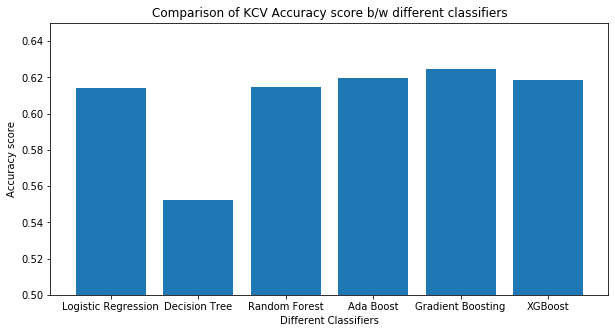

In [410]:
#Comparing KCV Accuracy score b/w different models
method=['Logistic Regression', 'Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boosting', 'XGBoost']
KCV_score=[LR_KCV.mean(), DT_KCV.mean(), RF_KCV.mean(), AB_KCV.mean(), GB_KCV.mean(), XGB_KCV.mean()]

plt.figure(figsize=(10,5))
plt.bar(method, KCV_score)
plt.ylim(0.5,0.65)
plt.title('Comparison of KCV Accuracy score b/w different classifiers')
plt.xlabel('Different Classifiers')
plt.ylabel('Accuracy score')

In [411]:
#Predicting 'roof' for missing Data
RF.fit(MTrain_x, MTrain_y)
MTest_y=RF.predict(MTest_x)

In [412]:
#Adding 'roof' and Remaining data as 'MTest'
MTest_y=pd.DataFrame(MTest_y,columns=['roof'])
MTest_y['RowId']=np.arange(0,len(MTest_y))
MTest=MTest_x.copy()
MTest['RowId']=np.arange(0,len(MTest))
MTest=MTest.merge(MTest_y, how='inner', on='RowId')
MTest.drop(['RowId'],1,inplace=True)
#Calculating 'Roof(Area)' for missing Data
MTest['Roof(Area)']=[MTrain['Roof(Area)'].mean() if x==1 else 0 for x in MTest['roof']]
MTest

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Lawn(Area),Nfloors,API,ANB,Price,roof,Roof(Area)
0,348,9.0,5.0,3.0,5,84.0,5,91.0,6,4422,1.0,47.267196
1,329,7.0,7.0,4.0,6,105.0,5,97.0,6,4322,1.0,47.267196
2,310,7.0,5.0,4.0,6,76.0,5,75.0,3,3889,1.0,47.267196
3,308,8.0,7.0,5.0,7,90.0,6,84.0,6,4658,0.0,0.000000
4,338,6.0,6.0,6.0,7,96.0,7,67.0,1,4317,1.0,47.267196
...,...,...,...,...,...,...,...,...,...,...,...,...
648,317,7.0,6.0,7.0,8,75.0,5,98.0,5,4733,1.0,47.267196
649,330,5.0,4.0,4.0,6,90.0,6,98.0,5,4152,1.0,47.267196
650,322,6.0,7.0,6.0,7,84.0,4,91.0,4,4276,0.0,0.000000
651,290,9.0,4.0,1.0,3,107.0,3,82.0,4,4163,0.0,0.000000


In [413]:
#Chaning columns order for 'MTrain'
cols=MTrain.columns.tolist()
cols=cols[0:5]+cols[7:12]+cols[5:7]
MTrain=MTrain[cols]
MTrain

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Lawn(Area),Nfloors,API,ANB,Price,roof,Roof(Area)
1,311,6.0,5.0,5.0,6,86.0,6,83.0,4,3432,0.0,0.0
2,342,5.0,6.0,6.0,7,85.0,4,95.0,5,4066,1.0,120.0
4,307,6.0,2.0,3.0,4,76.0,2,64.0,4,3031,0.0,0.0
5,297,6.0,6.0,4.0,6,103.0,6,73.0,6,4223,1.0,81.0
6,292,9.0,7.0,6.0,7,101.0,5,88.0,5,4993,1.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3293,310,5.0,3.0,3.0,5,105.0,3,91.0,2,3391,1.0,97.0
3295,338,7.0,3.0,2.0,4,87.0,3,75.0,6,3714,0.0,0.0
3296,307,8.0,4.0,5.0,6,88.0,4,83.0,6,3824,1.0,88.0
3297,352,5.0,3.0,4.0,5,100.0,2,99.0,4,3533,1.0,88.0


In [414]:
#Combaining 'MTrain' and 'MTest'
BMData=MTrain.append(MTest,sort=False,ignore_index=True)
#Filling missing values with their column means
BMData=BMData.fillna(BMData.mean())
BMData

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Lawn(Area),Nfloors,API,ANB,Price,roof,Roof(Area)
0,311,6.0,5.0,5.0,6,86.0,6,83.0,4,3432,0.0,0.000000
1,342,5.0,6.0,6.0,7,85.0,4,95.0,5,4066,1.0,120.000000
2,307,6.0,2.0,3.0,4,76.0,2,64.0,4,3031,0.0,0.000000
3,297,6.0,6.0,4.0,6,103.0,6,73.0,6,4223,1.0,81.000000
4,292,9.0,7.0,6.0,7,101.0,5,88.0,5,4993,1.0,78.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3294,317,7.0,6.0,7.0,8,75.0,5,98.0,5,4733,1.0,47.267196
3295,330,5.0,4.0,4.0,6,90.0,6,98.0,5,4152,1.0,47.267196
3296,322,6.0,7.0,6.0,7,84.0,4,91.0,4,4276,0.0,0.000000
3297,290,9.0,4.0,1.0,3,107.0,3,82.0,4,4163,0.0,0.000000


In [415]:
#Adding 'id' column to 'Test' Data
BMData['id']=Test['id']
#Changing order of columns
BMData=BMData[['id','Area(total)', 'Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms', 'Lawn(Area)',
 'Nfloors', 'API', 'ANB', 'Price', 'roof', 'Roof(Area)']]
BTest=BMData.copy()
BTest

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Lawn(Area),Nfloors,API,ANB,Price,roof,Roof(Area)
0,1,311,6.0,5.0,5.0,6,86.0,6,83.0,4,3432,0.0,0.000000
1,2,342,5.0,6.0,6.0,7,85.0,4,95.0,5,4066,1.0,120.000000
2,3,307,6.0,2.0,3.0,4,76.0,2,64.0,4,3031,0.0,0.000000
3,4,297,6.0,6.0,4.0,6,103.0,6,73.0,6,4223,1.0,81.000000
4,5,292,9.0,7.0,6.0,7,101.0,5,88.0,5,4993,1.0,78.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,3295,317,7.0,6.0,7.0,8,75.0,5,98.0,5,4733,1.0,47.267196
3295,3296,330,5.0,4.0,4.0,6,90.0,6,98.0,5,4152,1.0,47.267196
3296,3297,322,6.0,7.0,6.0,7,84.0,4,91.0,4,4276,0.0,0.000000
3297,3298,290,9.0,4.0,1.0,3,107.0,3,82.0,4,4163,0.0,0.000000


# Model bulding

In [416]:
BTrain.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Lawn(Area),Nfloors,API,ANB,Price,roof,Roof(Area),Grade
0,305,8.0,2.0,1.0,3.0,76.0,2,63.0,4,3826,0.0,0.0,D
1,344,6.0,7.0,7.0,8.0,83.0,7,97.0,1,4458,0.0,0.0,B
2,294,8.0,4.0,3.0,4.0,78.0,1,88.0,4,4199,1.0,97.0,C
3,328,5.0,4.0,2.0,4.0,91.0,5,86.0,1,3462,0.0,0.0,D
4,335,8.0,6.0,5.0,7.0,99.0,6,75.0,1,4324,0.0,0.0,C


In [417]:
#Saparting x and y variables
BTrain_x=BTrain.drop(['Grade'],1)
BTrain_y=BTrain['Grade']

In [418]:
#Fitting model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

DT=DecisionTreeClassifier()
RF=RandomForestClassifier()
AB=AdaBoostClassifier()
GB=GradientBoostingClassifier()
XGB=XGBClassifier()

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 10, shuffle = True, random_state = 1)
DT_KCV = cross_val_score(DT, BTrain_x, BTrain_y, cv=folds)
RF_KCV = cross_val_score(RF, BTrain_x, BTrain_y, cv=folds)
AB_KCV = cross_val_score(AB, BTrain_x, BTrain_y, cv=folds)
GB_KCV = cross_val_score(GB, BTrain_x, BTrain_y, cv=folds)
XGB_KCV = cross_val_score(XGB, BTrain_x, BTrain_y, cv=folds)

Text(0, 0.5, 'Accuracy score')

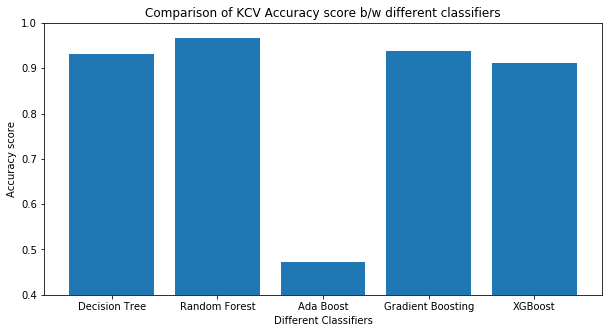

In [420]:
#Comparing KCV Accuracy score b/w different models
method=['Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boosting', 'XGBoost']
KCV_score=[DT_KCV.mean(), RF_KCV.mean(), AB_KCV.mean(), GB_KCV.mean(), XGB_KCV.mean()]

plt.figure(figsize=(10,5))
plt.bar(method, KCV_score)
plt.ylim(0.4,1)
plt.title('Comparison of KCV Accuracy score b/w different classifiers')
plt.xlabel('Different Classifiers')
plt.ylabel('Accuracy score')

Text(0, 0.5, 'Devation of accuracy score')

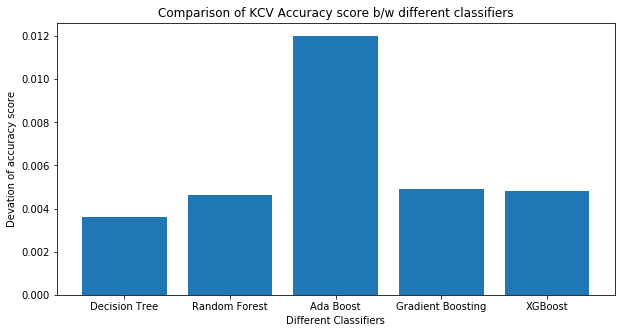

In [423]:
#Comparing KCV Accuracy score b/w different models
method=['Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boosting', 'XGBoost']
KCV_score=[DT_KCV.std(), RF_KCV.std(), AB_KCV.std(), GB_KCV.std(), XGB_KCV.std()]

plt.figure(figsize=(10,5))
plt.bar(method, KCV_score)
#plt.ylim(0.4,1)
plt.title('Comparison of KCV Accuracy score b/w different classifiers')
plt.xlabel('Different Classifiers')
plt.ylabel('Devation of accuracy score')

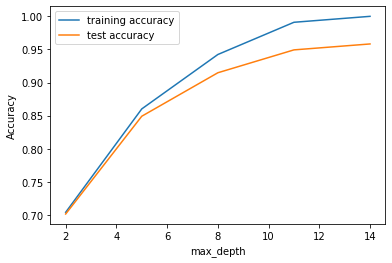

In [429]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# parameters to build the model
parameters = {'max_depth': range(2, 16, 3)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=5, 
                   scoring="accuracy", return_train_score=True)
rf.fit(BTrain_x, BTrain_y)

scores = rf.cv_results_
pd.DataFrame(scores).head()

# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

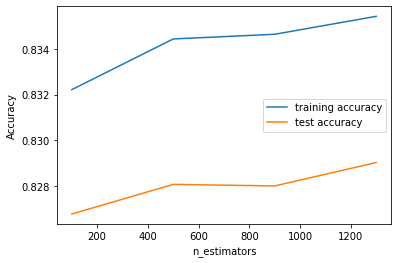

In [430]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# parameters to build the model
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=5, 
                   scoring="accuracy", return_train_score=True)
rf.fit(BTrain_x, BTrain_y)

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

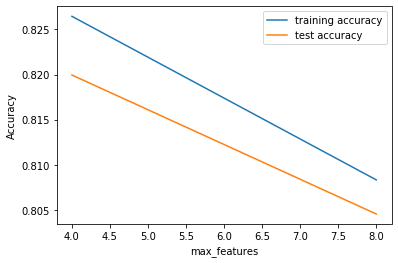

In [431]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# parameters to build the model
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=5, 
                   scoring="accuracy", return_train_score=True)
rf.fit(BTrain_x, BTrain_y)

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

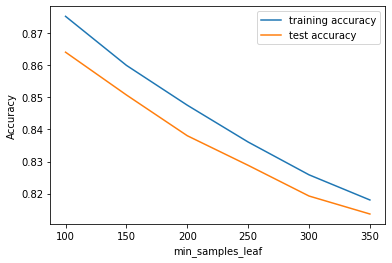

In [432]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# parameters to build the model
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=5, 
                   scoring="accuracy", return_train_score=True)
rf.fit(BTrain_x, BTrain_y)

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

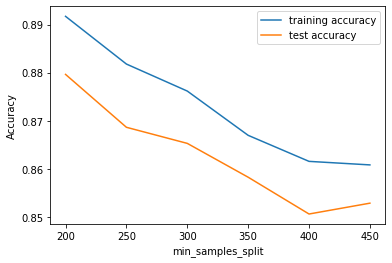

In [433]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# parameters to build the model
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=5, 
                   scoring="accuracy", return_train_score=True)
rf.fit(BTrain_x, BTrain_y)

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

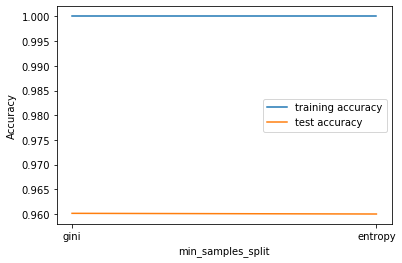

In [436]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# parameters to build the model
parameters = {'criterion': ['gini','entropy']}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=5, 
                   scoring="accuracy", return_train_score=True)
rf.fit(BTrain_x, BTrain_y)

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_criterion"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_criterion"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [437]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(10, 20, 3),
    'min_samples_leaf': range(50, 150, 30),
    'min_samples_split': range(100, 250, 50),
    'n_estimators': range(1000, 1500, 50), 
    'max_features': range(1, 5, 1),
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(BTrain_x, BTrain_y)

Fitting 3 folds for each of 1920 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 86.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 119.5min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 161.7min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 793.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 852.0min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 913.9min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 971.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [438]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8792349726775956 using {'max_depth': 16, 'max_features': 3, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 1350}


In [458]:
rf=RandomForestClassifier(max_depth=16,max_features=3,min_samples_leaf=50,min_samples_split=50, n_estimators=1350)
rf.fit(BTrain_x, BTrain_y)
rf.predict(BTest.iloc[:,1:13])

array(['D', 'C', 'D', ..., 'C', 'C', 'D'], dtype=object)

In [459]:
#Final Test Data with predicted 'Grade'
BTest['Grade']=rf.predict(BTest.iloc[:,1:13])
BTest

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Lawn(Area),Nfloors,API,ANB,Price,roof,Roof(Area),Grade
0,1,311,6.0,5.0,5.0,6,86.0,6,83.0,4,3432,0.0,0.000000,D
1,2,342,5.0,6.0,6.0,7,85.0,4,95.0,5,4066,1.0,120.000000,C
2,3,307,6.0,2.0,3.0,4,76.0,2,64.0,4,3031,0.0,0.000000,D
3,4,297,6.0,6.0,4.0,6,103.0,6,73.0,6,4223,1.0,81.000000,C
4,5,292,9.0,7.0,6.0,7,101.0,5,88.0,5,4993,1.0,78.000000,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,3295,317,7.0,6.0,7.0,8,75.0,5,98.0,5,4733,1.0,47.267196,B
3295,3296,330,5.0,4.0,4.0,6,90.0,6,98.0,5,4152,1.0,47.267196,C
3296,3297,322,6.0,7.0,6.0,7,84.0,4,91.0,4,4276,0.0,0.000000,C
3297,3298,290,9.0,4.0,1.0,3,107.0,3,82.0,4,4163,0.0,0.000000,C
